In [5]:
!pip install pycaret

In [30]:
# Importing necessary libraries
import pycaret
from pycaret.classification import *

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

In [31]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Kelsey2701/spotify-project/main/reordered_music_playlists.csv'
df = pd.read_csv(url)

## Explore Dataset

In [32]:
# View dataset
df

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,target,Track Name,Artist Name(s)
0,0.280000,0.724,207333,0.647,0.000000,1,0.102,-5.642,1,0.0658,106.960,4,0.435,0,"thank u, next",Ariana Grande
1,0.022300,0.702,203760,0.635,0.000000,11,0.283,-6.917,0,0.2650,144.004,4,0.873,0,Sorry Not Sorry,Demi Lovato
2,0.031600,0.774,246240,0.739,0.000006,0,0.119,-4.022,1,0.0952,126.002,4,0.823,0,Shout Out to My Ex,Little Mix
3,0.120000,0.660,200717,0.767,0.000000,2,0.181,-3.016,1,0.2610,181.819,4,0.554,0,"Sit Still, Look Pretty",Daya
4,0.000673,0.738,219733,0.875,0.000556,7,0.285,-3.141,1,0.1270,114.962,4,0.538,0,Wings,Little Mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.142000,0.821,142657,0.636,0.000000,11,0.233,-4.479,1,0.1690,127.961,4,0.163,1,HOTEL LOBBY (Unc & Phew),"Quavo,Takeoff"
789,0.117000,0.938,123672,0.606,0.000000,6,0.528,-6.396,0,0.4190,121.108,4,0.706,1,SLUT ME OUT,NLE Choppa
790,0.046200,0.584,199906,0.889,0.828000,1,0.309,-5.941,0,0.0343,126.040,4,0.464,1,Levels - Radio Edit,Avicii
791,0.003830,0.561,175238,0.965,0.000007,7,0.371,-3.673,0,0.0343,128.040,4,0.304,1,I'm Good (Blue),"David Guetta,Bebe Rexha"


In [33]:
# Get summary statistics
df.describe()

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,target
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,0.177292,0.669636,210915.528373,0.675170,0.037276,5.311475,0.198378,-6.414730,0.578815,0.115145,121.727765,3.970996,0.507165,0.762926
std,0.240997,0.152934,43459.659103,0.192336,0.132330,3.758839,0.156603,2.959503,0.494061,0.105705,27.421192,0.276003,0.238983,0.425557
min,0.000041,0.000000,13578.000000,0.048800,0.000000,0.000000,0.033500,-23.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015000,0.581000,183333.000000,0.562000,0.000000,1.000000,0.095300,-7.470000,0.000000,0.042700,101.003000,4.000000,0.314000,1.000000
50%,0.066000,0.687000,209423.000000,0.701000,0.000003,6.000000,0.136000,-5.781000,1.000000,0.067400,123.913000,4.000000,0.509000,1.000000
75%,0.239000,0.776000,231624.000000,0.833000,0.000807,9.000000,0.259000,-4.479000,1.000000,0.144000,137.996000,4.000000,0.705000,1.000000
max,0.978000,0.983000,386906.000000,0.976000,0.927000,11.000000,0.961000,-1.357000,1.000000,0.689000,203.911000,5.000000,0.976000,1.000000


In [34]:
# Get types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      793 non-null    float64
 1   Danceability      793 non-null    float64
 2   Duration (ms)     793 non-null    int64  
 3   Energy            793 non-null    float64
 4   Instrumentalness  793 non-null    float64
 5   Key               793 non-null    int64  
 6   Liveness          793 non-null    float64
 7   Loudness          793 non-null    float64
 8   Mode              793 non-null    int64  
 9   Speechiness       793 non-null    float64
 10  Tempo             793 non-null    float64
 11  Time Signature    793 non-null    int64  
 12  Valence           793 non-null    float64
 13  target            793 non-null    int64  
 14  Track Name        793 non-null    object 
 15  Artist Name(s)    793 non-null    object 
dtypes: float64(9), int64(5), object(2)
memory us

In [35]:
# Check for missing values
print(df.isnull().sum())

Acousticness        0
Danceability        0
Duration (ms)       0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
Time Signature      0
Valence             0
target              0
Track Name          0
Artist Name(s)      0
dtype: int64


## Visualize

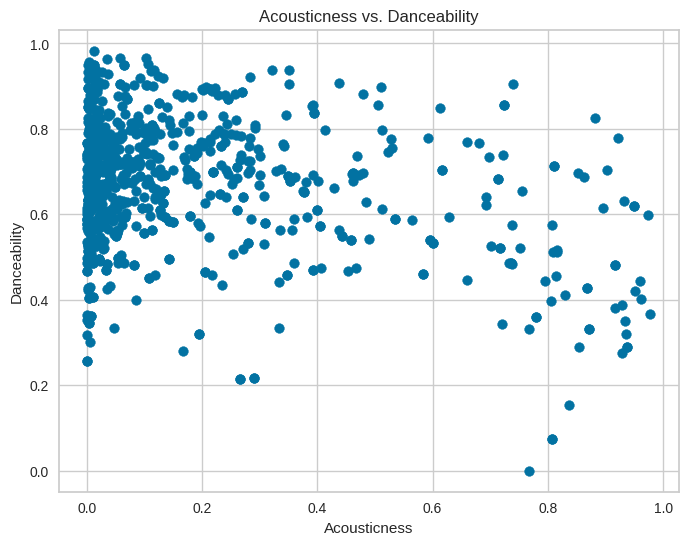

In [36]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Acousticness'], df['Danceability'])
plt.title('Acousticness vs. Danceability')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

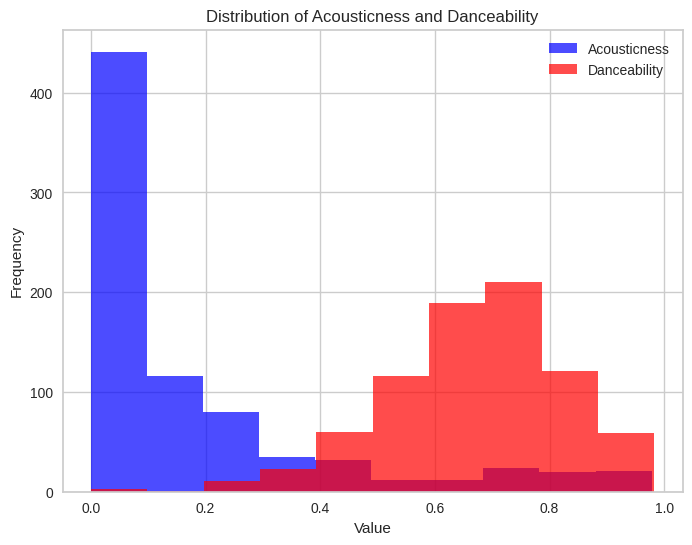

In [37]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Acousticness'], bins=10, alpha=0.7, color='blue', label='Acousticness')
plt.hist(df['Danceability'], bins=10, alpha=0.7, color='red', label='Danceability')
plt.title('Distribution of Acousticness and Danceability')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

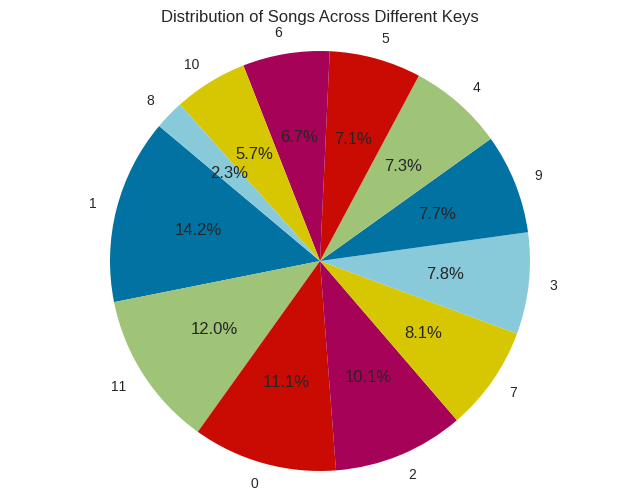

In [38]:
# Pie chart for distribution of songs across different keys
plt.figure(figsize=(8, 6))
plt.pie(df['Key'].value_counts(), labels=df['Key'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs Across Different Keys')
plt.axis('equal')
plt.show()

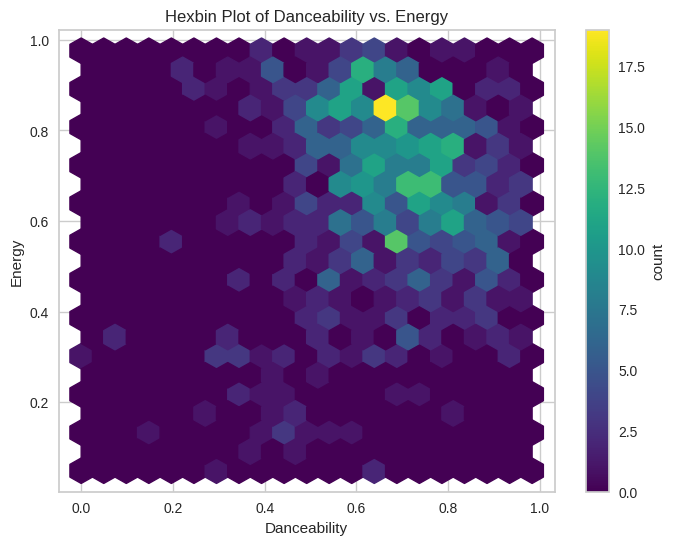

In [39]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['Danceability'], df['Energy'], gridsize=20, cmap='viridis')
plt.colorbar(label='count')
plt.title('Hexbin Plot of Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

## Training and testing

In [40]:
# init setup function
cat_features = ['Key', 'Mode']
experiment = setup(df, target = 'target', categorical_features=cat_features)

,Description,Value
0,Session id,991
1,Target,target
2,Target type,Binary
3,Original data shape,"(793, 16)"
4,Transformed data shape,"(793, 27)"
5,Transformed train set shape,"(555, 27)"
6,Transformed test set shape,"(238, 27)"
7,Numeric features,11
8,Categorical features,2
9,Preprocess,True


In [41]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8035,0.0000,0.9220,0.8376,0.8773,0.3860,0.4022,1.0320
dummy,Dummy Classifier,0.7622,0.0000,1.0000,0.7622,0.8650,0.0000,0.0000,0.1140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8035,0.0,0.922,0.8376,0.8773,0.386,0.4022,1.032
dummy,Dummy Classifier,0.7622,0.0,1.000,0.7622,0.8650,0.000,0.0000,0.114


## Making Predictions Using the Model

In [43]:
predictions = predict_model(best_model, df)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9470,0.9585,0.9851,0.9475,0.9660,0.8468,0.8501


,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Track Name,Artist Name(s),target,prediction_label,prediction_score
0,0.280000,0.724,207333,0.647,0.000000,1,0.102,-5.642,1,0.0658,106.959999,4,0.435,"thank u, next",Ariana Grande,0,0,0.6338
1,0.022300,0.702,203760,0.635,0.000000,11,0.283,-6.917,0,0.2650,144.003998,4,0.873,Sorry Not Sorry,Demi Lovato,0,0,0.9248
2,0.031600,0.774,246240,0.739,0.000006,0,0.119,-4.022,1,0.0952,126.001999,4,0.823,Shout Out to My Ex,Little Mix,0,0,0.9580
3,0.120000,0.660,200717,0.767,0.000000,2,0.181,-3.016,1,0.2610,181.819000,4,0.554,"Sit Still, Look Pretty",Daya,0,0,0.9487
4,0.000673,0.738,219733,0.875,0.000556,7,0.285,-3.141,1,0.1270,114.961998,4,0.538,Wings,Little Mix,0,0,0.9684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.142000,0.821,142657,0.636,0.000000,11,0.233,-4.479,1,0.1690,127.960999,4,0.163,HOTEL LOBBY (Unc & Phew),"Quavo,Takeoff",1,1,0.9929
789,0.117000,0.938,123672,0.606,0.000000,6,0.528,-6.396,0,0.4190,121.108002,4,0.706,SLUT ME OUT,NLE Choppa,1,1,0.9944
790,0.046200,0.584,199906,0.889,0.828000,1,0.309,-5.941,0,0.0343,126.040001,4,0.464,Levels - Radio Edit,Avicii,1,1,0.9381
791,0.003830,0.561,175238,0.965,0.000007,7,0.371,-3.673,0,0.0343,128.039993,4,0.304,I'm Good (Blue),"David Guetta,Bebe Rexha",1,1,0.8851


In [44]:
# save the model
save_model(best_model, model_name='Song Recommender')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Acousticness', 'Danceability',
                                              'Duration (ms)', 'Energy',
                                              'Instrumentalness', 'Liveness',
                                              'Loudness', 'Speechiness', 'Tempo',
                                              'Time Signature', 'Valence'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               m...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
             

In [45]:
# load model and store into variable
model = load_model('Song Recommender')

Transformation Pipeline and Model Successfully Loaded


## Model Evaluation

In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(predictions['target'], predictions['prediction_label'])
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Calculating the accuracy score
acc_score = accuracy_score(predictions['target'], predictions['prediction_label'])

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(predictions['target'], predictions['prediction_label']))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,155,33
Actual 1,9,596


Accuracy Score : 0.9470365699873896
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       188
           1       0.95      0.99      0.97       605

    accuracy                           0.95       793
   macro avg       0.95      0.90      0.92       793
weighted avg       0.95      0.95      0.95       793



## Set up pycaret to ignore string columns